In [4]:
from datasets import load_from_disk

# Specify the path to the dataset
dataset_path = '/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal'

# Load the dataset
dataset = load_from_disk(dataset_path)

# Display the dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
})


In [8]:
for split in ["train", "validation", "test"]:
    for i in range(len(dataset[split])):
        dataset[split][i]["image"] = dataset[split][i]["image"].replace("v3_spatial_grid_multimodal_20241027-160149", "v3_spatial_grid_multimodal")
dataset.save_to_disk(dataset_path + "_")
    

/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_0.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_1.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_2.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_3.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_4.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_5.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_6.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_7.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_8.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_9.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_10.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/images/train_11.png
/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal/ima

'/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal_20241027-160149/images/train_0.png'

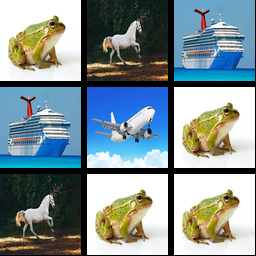

The grid above is size 3 by 3. Each cell contains an object from ['airplane', 'ship', 'horse', 'frog'].
What object is in row 2, column 0?
A: horse
What object is in row 2, column 1?
A: frog
What object is in row 1, column 0?
A: ship
What object is in row 0, column 2?
A: ship
What object is in row 2, column 2?
A: frog
What object is in row 0, column 0?
A: frog
What object is in row 0, column 1?
A: horse
What object is in row 1, column 1?
A: airplane
What object is in row 1, column 2?
A: frog


In [5]:
import random 
from PIL import Image 

randint = random.randint(0, 1000)
display(Image.open(dataset['train'][randint]["image"]))
print(dataset['train'][randint]["prompt"])
for conv in dataset["train"][randint]["conversations"]:
    print(conv[0])
    print(conv[1])

In [144]:
story = "One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, 'Mom, I found this needle. Can you share it with me and sew my shirt?' Her mom smiled and said, 'Yes, Lily, we can share the needle and fix your shirt.' Together, they shared the needle and sewed the button on Lily's shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together."

len(dataset['train'][random.randint(0, 17)]["text"])

586

In [80]:
# Specify the path to the new dataset
new_dataset_path = '/home/sjoshi/lmm/data/generated/v3_spatial_grid'

# Load the new dataset
new_dataset = load_from_disk(new_dataset_path)

# Display the new dataset
print(new_dataset)

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 1000000
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text'],
        num_rows: 1000
    })
})


In [82]:
from PIL import Image

i = 0

#display(Image.open(new_dataset['train'][i]["image_1"]))
print(new_dataset["train"][i]["text"])

| deer | cat | bird |
| deer | cat | cat |
| bird | dog | bird |
The grid above is size 3 by 3. Each cell contains an object from ['deer', 'bird', 'dog', 'cat'].
What object is in row 2, column 2? A: bird
What object is in row 1, column 2? A: cat
What object is in row 0, column 0? A: deer
What object is in row 0, column 1? A: cat
What object is in row 1, column 0? A: deer
What object is in row 1, column 1? A: cat
What object is in row 0, column 2? A: bird
What object is in row 2, column 1? A: dog
What object is in row 2, column 0? A: bird


In [73]:
import pandas as pd
from datasets import Dataset
from datasets import DatasetDict

def truncate_before_substring(text, substring):
    index = text.find(substring)
    if index != -1:
        return text[index:]
    return text

def make_multimodal_prompt(text):
    return "<image_1>\n" + truncate_before_substring(text, "The grid above")

fixed_dataset = {}
for split in ["train", "validation", "test"]:
    fixed_dataset[split] = []
    for i, example in enumerate(new_dataset[split]):
        example["image_1"] = example["image_1"].replace("data/generated/v3_spatial_grid_multimodal_20241022-144708", "data/generated/v3_spatial_grid_multimodal")
        fixed_dataset[split].append(example)
        
    # Create a dataframe from all examples for the current split
    df = pd.DataFrame(fixed_dataset[split])

    # Convert the dataframe to a HuggingFace dataset
    hf_dataset = Dataset.from_pandas(df)

    # Merge the new dataset with the existing dataset for the current split
    fixed_dataset[split] = hf_dataset
fixed_dataset = DatasetDict(fixed_dataset)
fixed_dataset.save_to_disk("/home/sjoshi/lmm/data/generated/v3_spatial_grid_multimodal")

Saving the dataset (1/1 shards): 100%|██████████| 1000/1000 [00:00<00:00, 338851.51 examples/s]
